### Nome: Ozeas dos Santos Nascimento

### INFORMAÇÕES BASE DE DADOS

Dataset utilizado: Credit Card Customer Data
Fonte: Kaggle https://www.kaggle.com/datasets/aryashah2k/credit-card-customer-data?resource=download

Problemas de negócio:

Cada cliente possui um perfil (Comportamento); e devido ao grande volume de dados gerados ao cadastrar cada cliente, seria impossível comparar linha a linha, usuário a usuário sem a ajuda de um algoritmo. Para que se possa extrair o máximo de informação da fonte de dados, e o atendimento possa ser realizado de maneira personalizada e com ganho em desempenho e produtividade, farei uso de dois algoritmos de Machine Learning: A Clusterização dos Dados e a Árvore de Decisão.


Objetivo 1 Segmentar os clientes: 
Utilizarei o algoritmo de clusterização para classificar os clientes registrados no dataset especificado, afim de identificar caracteristicas que possam contribuir para um marketing mais direcionado (personalizado). Os clientes receberão as seguintes classificações: Ouro, Prata e Bronze. Como parametro, utilizarei a média dos valores do limite de crédito.

Objetivo 2 - Árvore de decisão:
Após a seguimentação dos clientes, utilizarei a tecnica de aprendizado de máquina supervisionado, na intensão de treinar o modelo, para ao receber novos dados, estes possam ser classificados automáticamente.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans  #Biblioteca utilizada para a construção do K-means


from sklearn import datasets, tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder 

In [3]:
df_cliente_cred = pd.read_csv("Credit_Card_Customer_Data.csv")
df_cliente_cred

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


#### Temos o total de 660 registros, sem valores nulos ou faltantes, e as 7 colunas possuem o mesmo Dtype (int64)

In [4]:
df_cliente_cred.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


#### A média do Limite de Crédito em nosso Dataset é de 34574.242424.

In [5]:
df_cliente_cred = df_cliente_cred[["Avg_Credit_Limit","Total_Credit_Cards","Total_visits_bank","Total_visits_online","Total_calls_made"]]

In [6]:
df_cliente_cred.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,34574.242424,4.706061,2.403030,2.606061,3.583333
std,37625.487804,2.167835,1.631813,2.935724,2.865317
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


#### Verificando a existência de outliers


Não foi detectado a presença de outliers


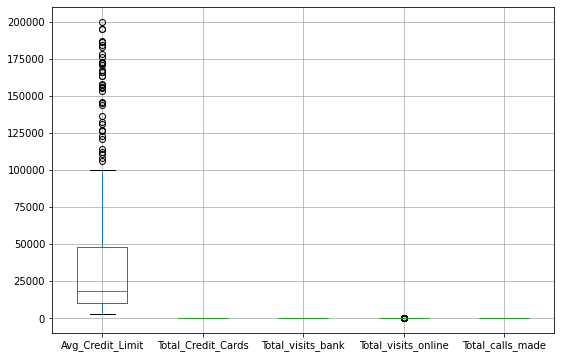

In [7]:
plt.rcParams["figure.figsize"] = [9,6]
boxplot = df_cliente_cred.boxplot(column=["Avg_Credit_Limit","Total_Credit_Cards","Total_visits_bank","Total_visits_online","Total_calls_made"])
print("Não foi detectado a presença de outliers")

### Tratamento Outliers

### Os Outliers

Os valores especificados como outliers não podem ser deletados da base de dados, pois estes representam 39 clientes com alto poder de compra, acima do normal. Para estes, pode ser interessante reserva-los em um database a parte, para um tratamento diferenciado. Seguiremos com os mesmos ainda presentes na base de dados.

In [8]:
q1 = df_cliente_cred["Avg_Credit_Limit"].quantile(0.25)
q3 = df_cliente_cred["Avg_Credit_Limit"].quantile(0.75)
IQR = q3 - q1
IQR

38000.0

Shape vip_customers (39, 5)


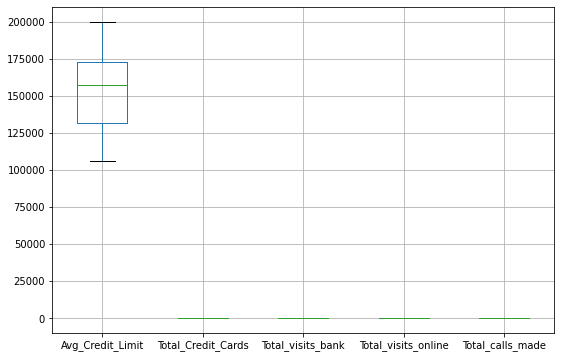

In [9]:
vip_customers= df_cliente_cred[((df_cliente_cred["Avg_Credit_Limit"] >(q3 + 1.5 * IQR)))]
plt.rcParams["figure.figsize"] = [9,6]
boxplot = vip_customers.boxplot(column=["Avg_Credit_Limit","Total_Credit_Cards","Total_visits_bank","Total_visits_online","Total_calls_made"])
print('Shape vip_customers', vip_customers.shape)

#### Distribuição das colunas

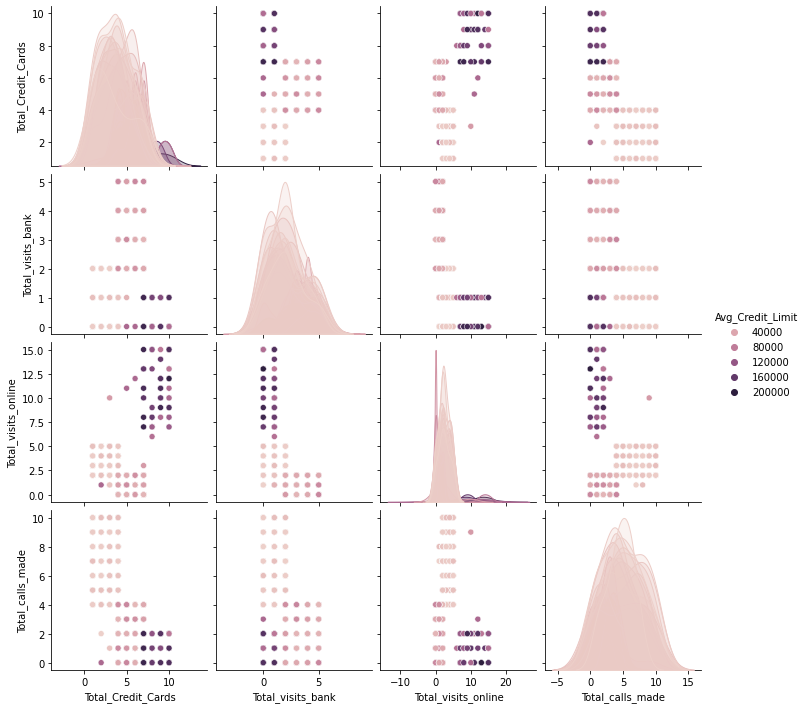

In [10]:
sns.pairplot(df_cliente_cred, hue= "Avg_Credit_Limit")
plt.show()

In [11]:
plt.rcParams['figure.figsize'] = [330,110]
sns.countplot(x="Avg_Credit_Limit", data = df_cliente_cred)
plt.title('Distribuição Média Limite de Crédito')

Text(0.5, 1.0, 'Distribuição Média Limite de Crédito')

Text(0.5, 1.0, 'Distribuição Visita aos Banco')

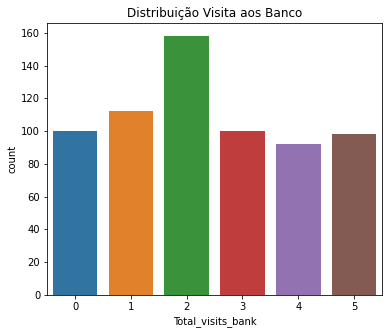

In [12]:
plt.rcParams['figure.figsize'] = [6,5]
sns.countplot(x="Total_visits_bank", data = df_cliente_cred)
plt.title('Distribuição Visita aos Banco')

Distribuição Visita Online


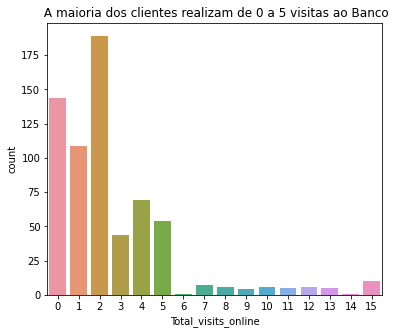

In [13]:
plt.rcParams['figure.figsize'] = [6,5]
sns.countplot(x="Total_visits_online", data = df_cliente_cred)
plt.title(' A maioria dos clientes realizam de 0 a 5 visitas ao Banco')
print('Distribuição Visita Online')

Distribuição Chamadas Telefônicas


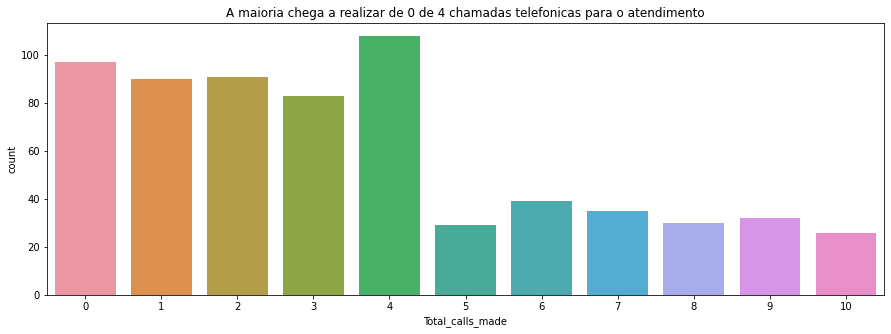

In [14]:
plt.rcParams['figure.figsize'] = [15,5]
sns.countplot(x="Total_calls_made", data = df_cliente_cred)
plt.title('A maioria chega a realizar de 0 de 4 chamadas telefonicas para o atendimento') 
print('Distribuição Chamadas Telefônicas')

#### Como indicado pelo grafico abaixo, utilizaremos o número de clusters igual a 3 (k=3) afim de classificar os cliente em 3 grupos (Ouro, Prata e Bronze).

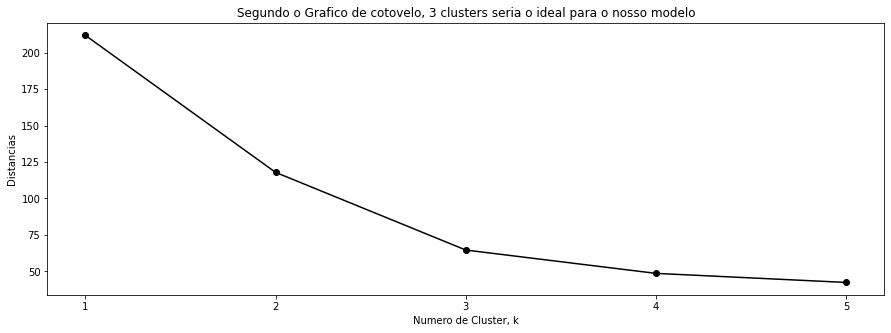

In [15]:

from sklearn.preprocessing import MinMaxScaler


normaliza = MinMaxScaler()
X_std = normaliza.fit_transform(df_cliente_cred)

ks = range(1,6)
inertias = []

for k in ks:
    model = KMeans(n_clusters = k, max_iter=200, random_state=170).fit(X_std)

    inertias.append(model.inertia_)

plt.plot(ks,inertias, '-o', color = 'black')
plt.xlabel('Numero de Cluster, k')
plt.ylabel('Distancias')
plt.title('Segundo o Grafico de cotovelo, 3 clusters seria o ideal para o nosso modelo')
plt.xticks(ks)
plt.show()

    

##### Utilizaremos 3 clusters conforme o grafico acima

### Aplicando o Kmeans

In [16]:
df_cliente_cred_normalizado = pd.DataFrame(X_std,columns=["Avg_Credit_Limit","Total_Credit_Cards","Total_visits_bank","Total_visits_online","Total_calls_made"])

In [17]:
km = KMeans(n_clusters=3, max_iter=600, random_state=170)
y_pred = km.fit_predict(df_cliente_cred_normalizado)
df_cliente_cred_normalizado['Cluster'] = y_pred
df_cliente_cred_normalizado

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster
0,0.492386,0.111111,0.2,0.066667,0.0,2
1,0.238579,0.222222,0.0,0.666667,0.9,0
2,0.238579,0.666667,0.2,0.200000,0.4,2
3,0.137056,0.444444,0.2,0.066667,0.4,0
4,0.492386,0.555556,0.0,0.800000,0.3,1
...,...,...,...,...,...,...
655,0.487310,1.000000,0.2,0.666667,0.0,1
656,0.411168,1.000000,0.2,0.866667,0.2,1
657,0.720812,0.777778,0.2,0.600000,0.1,1
658,0.857868,1.000000,0.2,1.000000,0.0,1


### Classificando cada grupo

In [18]:
retorno = normaliza.inverse_transform(X_std)
df_cliente_cred = pd.DataFrame(retorno, columns=["Avg_Credit_Limit","Total_Credit_Cards","Total_visits_bank","Total_visits_online","Total_calls_made"])
df_cliente_cred['Clusters'] = y_pred

In [19]:
# Relacionando clientes com limite de cartão = Bronze
bronze = df_cliente_cred.loc[(df_cliente_cred['Clusters']==0)]
bronze

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Clusters
1,50000.0,3.0,0.0,10.0,9.0,0
3,30000.0,5.0,1.0,1.0,4.0,0
5,20000.0,3.0,0.0,1.0,8.0,0
7,15000.0,3.0,0.0,1.0,1.0,0
8,5000.0,2.0,0.0,2.0,2.0,0
...,...,...,...,...,...,...
224,12000.0,4.0,1.0,5.0,9.0,0
225,16000.0,4.0,1.0,2.0,5.0,0
226,8000.0,1.0,2.0,4.0,8.0,0
227,8000.0,2.0,2.0,3.0,8.0,0


In [20]:
# Relacionando clientes com limite de cartão = Ouro
ouro = df_cliente_cred.loc[df_cliente_cred['Clusters']==1]
ouro

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Clusters
4,100000.0,6.0,0.0,12.0,3.0,1
6,100000.0,5.0,0.0,11.0,2.0,1
612,157000.0,9.0,1.0,14.0,1.0,1
613,94000.0,9.0,1.0,11.0,0.0,1
614,163000.0,8.0,1.0,7.0,1.0,1
615,131000.0,9.0,1.0,10.0,1.0,1
616,96000.0,10.0,1.0,11.0,2.0,1
617,136000.0,8.0,0.0,13.0,0.0,1
618,121000.0,7.0,0.0,13.0,2.0,1
619,158000.0,7.0,0.0,13.0,0.0,1


In [21]:
prata = df_cliente_cred.loc[df_cliente_cred['Clusters']==2]
prata

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Clusters
0,100000.0,2.0,1.0,1.0,0.0,2
2,50000.0,7.0,1.0,3.0,4.0,2
228,10000.0,7.0,2.0,0.0,0.0,2
229,8000.0,7.0,2.0,1.0,4.0,2
230,17000.0,4.0,5.0,0.0,2.0,2
...,...,...,...,...,...,...
607,34000.0,6.0,3.0,1.0,0.0,2
608,47000.0,4.0,4.0,1.0,0.0,2
609,38000.0,4.0,3.0,2.0,0.0,2
610,39000.0,7.0,2.0,1.0,0.0,2


In [22]:
df_cliente_cred.groupby('Clusters').agg({'Avg_Credit_Limit':['mean'],'Total_Credit_Cards':['median','min','mean','max'],'Total_visits_bank':['median','min','mean','max'],'Total_visits_online':['median','min','mean','max'],'Total_calls_made':['median','min','mean','max']})

Avg_Credit_Limit Total_Credit_Cards                       \
                     mean             median  min      mean   max   
Clusters                                                            
0            12253.333333                2.0  1.0  2.422222   5.0   
1           141040.000000                9.0  5.0  8.740000  10.0   
2            33792.207792                6.0  2.0  5.516883   7.0   

         Total_visits_bank                     Total_visits_online       \
                    median  min      mean  max              median  min   
Clusters                                                                  
0                      1.0  0.0  0.933333  2.0                 4.0  1.0   
1                      1.0  0.0  0.600000  1.0                11.0  6.0   
2                      3.0  1.0  3.496104  5.0                 1.0  0.0   

                          Total_calls_made                       
               mean   max           median  min      mean   max  
Clusters                                                         
0          3.542222  10.0              7.0  1.0  6.857778  10.0  
1         10.900000  15.0              1.0  0.0  1.080000   3.0  
2          0.981818   3.0              2.0  0.0  1.994805   4.0

### Analise:
#### Segundo os dados gerados pelo K-means, sendo k=3, conseguimos classificar os clientes em 3 grupos, tendo como base o limite de crédito disponibilizados.
#### 225 Clientes com limite de crédito com média de 12253.333333, foram classificados como classe "Bronze", e pertencem ao cluster 0. Estes clientes possuem em média 2 cartões e no maximo 5. Realizam no máximo 2 vezes a visita ao banco, dando preferência a resolver problemas ou tirar duvidas via internet(media 4x, e maximo 10x) ou chamadas telefonicas (media 7, maximo 10x)

#### 385 Clientes com limite de crédito com média de 33792.207792,  foram classificados como classe "Prata", e pertencem ao cluster 2. Estes clientes possuem em média 6 cartões e no maximo 7. Preferem resolver problemas ou retirar duvidas pessoalmente a instituição bancária (media = 3 visitas), estes evitam realizar operações online, visto que realizam em média apenas 1 visita online preferindo realizar operações telefonicas(media 2, maximo 4x)


#### 50 Clientes com limite de crédito com média de 141040.000000,  foram classificados como classe "Ouro", e pertencem ao cluster 1. Estes clientes possuem em média 9 cartões e no maximo 10. Preferem resolver problemas ou retirar duvidas através da internet (media = 11 visitas online), estes evitam realizar operações presenciais (1 visita bancária) ou telefonicas(media 1 ligação)

### Árvore de Decisão

### Utilizaremos o algoritmo da árvore de decisão para treinar o modelo e predizer a classificação do cliente (Ouro, prata e bronze), de acordo com suas features.

Classificação dos clientes - Criamos uma nova coluna, especificando a classe de cada cliente, como encontrado na segmentação acima.

In [23]:
ouro["Classificacao"] = "Ouro"
prata["Classificacao"] = "Prata"
bronze["Classificacao"] = "Bronze"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

### Join entre DFs

In [24]:
clientes  = pd.merge(ouro,prata, how='outer')
clientes = pd.merge(clientes,bronze, how='outer')
clientes


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Clusters,Classificacao
0,100000.0,6.0,0.0,12.0,3.0,1,Ouro
1,100000.0,5.0,0.0,11.0,2.0,1,Ouro
2,157000.0,9.0,1.0,14.0,1.0,1,Ouro
3,94000.0,9.0,1.0,11.0,0.0,1,Ouro
4,163000.0,8.0,1.0,7.0,1.0,1,Ouro
...,...,...,...,...,...,...,...
655,12000.0,4.0,1.0,5.0,9.0,0,Bronze
656,16000.0,4.0,1.0,2.0,5.0,0,Bronze
657,8000.0,1.0,2.0,4.0,8.0,0,Bronze
658,8000.0,2.0,2.0,3.0,8.0,0,Bronze


### Carga dos dados e particionamento das bases de treinamento e teste

### Transformação de dados / Particionamento da base

Converteremos a classe para labels únicos sequenciais, em seguida, particionaremos a base de dados em treinamento e teste

No código a seguir, são utilizados 10% para teste e 90% para treinamento

In [25]:
X = clientes.iloc[:,0:(clientes.shape[1] - 1)] 
le = LabelEncoder()
y = le.fit_transform(clientes.iloc[:,(clientes.shape[1] - 1)])

In [39]:
X

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Clusters
0,100000.0,6.0,0.0,12.0,3.0,1
1,100000.0,5.0,0.0,11.0,2.0,1
2,157000.0,9.0,1.0,14.0,1.0,1
3,94000.0,9.0,1.0,11.0,0.0,1
4,163000.0,8.0,1.0,7.0,1.0,1
...,...,...,...,...,...,...
655,12000.0,4.0,1.0,5.0,9.0,0
656,16000.0,4.0,1.0,2.0,5.0,0
657,8000.0,1.0,2.0,4.0,8.0,0
658,8000.0,2.0,2.0,3.0,8.0,0


In [26]:
clientes.iloc[:,(clientes.shape[1] - 1)]

0        Ouro
1        Ouro
2        Ouro
3        Ouro
4        Ouro
        ...  
655    Bronze
656    Bronze
657    Bronze
658    Bronze
659    Bronze
Name: Classificacao, Length: 660, dtype: object

In [27]:
# Particiona a base de dados
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3) #SEED 

## Indução do Modelo

Agora, faremos uso dos 3 passos para indução do modelo:

1.   Instanciar o modelo: ``` DecisionTreeClassifier()```
2.   Treinar o modelo: ```fit()```
3.   Testar o modelo: ```predict()```



In [28]:
clientes_tree = DecisionTreeClassifier(random_state=0, criterion='entropy')
clientes_tree = clientes_tree.fit(X_train, y_train)

In [29]:
clientes_tree.predict(X_train)

array([2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 0, 1, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0,
       2, 2, 0, 2, 0, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 0,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 1, 2, 2, 0, 0, 2, 0, 2, 2, 1, 0,
       2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       1, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 1, 0, 0, 2, 0, 1, 2, 0, 2, 0, 0, 1, 0, 2, 2, 2, 0, 2,
       2, 0, 2, 2, 2, 0, 1, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0,
       2, 2, 1, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 1, 0,
       0, 0, 2, 2, 0, 0, 0, 2, 2, 1, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0,
       0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2,
       2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 1, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0, 1, 2, 0, 2, 2, 2,
       0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2,

In [30]:
y_train

array([2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 0, 1, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0,
       2, 2, 0, 2, 0, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 0,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 1, 2, 2, 0, 0, 2, 0, 2, 2, 1, 0,
       2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       1, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 1, 0, 0, 2, 0, 1, 2, 0, 2, 0, 0, 1, 0, 2, 2, 2, 0, 2,
       2, 0, 2, 2, 2, 0, 1, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0,
       2, 2, 1, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 1, 0,
       0, 0, 2, 2, 0, 0, 0, 2, 2, 1, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0,
       0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2,
       2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 1, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0, 1, 2, 0, 2, 2, 2,
       0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2,

In [31]:
print("Acurácia (base de treinamento):", clientes_tree.score(X_train, y_train))

Acurácia (base de treinamento): 1.0


In [32]:
# Avaliação na base de testes (previsão)

y_pred = clientes_tree.predict(X_test)
y_pred

array([0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0,
       2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2,
       0, 1, 0, 0, 2, 1, 2, 0, 1, 2, 0, 2, 0, 2, 1, 2, 2, 0, 2, 2, 2, 0,
       1, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 1, 1, 2, 2, 0,
       0, 1, 0, 0, 1, 2, 2, 0, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 0, 0, 0, 1, 0, 2, 2, 0, 2, 0, 2, 0, 1, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2,
       0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0])

In [33]:
y_test

array([0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0,
       2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2,
       0, 1, 0, 0, 2, 1, 2, 0, 1, 2, 0, 2, 0, 2, 1, 2, 2, 0, 2, 2, 2, 0,
       1, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 1, 1, 2, 2, 0,
       0, 1, 0, 0, 1, 2, 2, 0, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 0, 0, 0, 1, 0, 2, 2, 0, 2, 0, 2, 0, 1, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2,
       0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0])

In [34]:
print("Acurácia de previsão:", accuracy_score(y_test, y_pred))

Acurácia de previsão: 1.0


In [35]:
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[ 72   0   0]
 [  0  17   0]
 [  0   0 109]]


In [36]:
cnf_table = pd.DataFrame(data=cnf_matrix, index=["Ouro", "Prata", "Bronze"], columns=["Ouro (prev)", "Prata (prev)", "Bronze (prev)"])
print(cnf_table)

        Ouro (prev)  Prata (prev)  Bronze (prev)
Ouro             72             0              0
Prata             0            17              0
Bronze            0             0            109


In [37]:
print(classification_report(y_test, y_pred, target_names=["Ouro", "Prata", "Bronze"]))

              precision    recall  f1-score   support

        Ouro       1.00      1.00      1.00        72
       Prata       1.00      1.00      1.00        17
      Bronze       1.00      1.00      1.00       109

    accuracy                           1.00       198
   macro avg       1.00      1.00      1.00       198
weighted avg       1.00      1.00      1.00       198



#### De acordo com o report da classificação, tivemos a precisão, revocação e acuracia de 100%; Aumentando a probabilidade de ocorrencia de overfiting, devido ao ajuste do conjunto de dados anteriormente observado.


Para a nossa tarefa de classificação, estamos utilizando o critério de entropy para separar os dados em nosso modelo de aprendizado supervisionado. O objetivo do método é criar uma árvore que aprende com os dados por meio de regras básicas, chamadas de if-then rules.

### Exibição da árvore de decisão

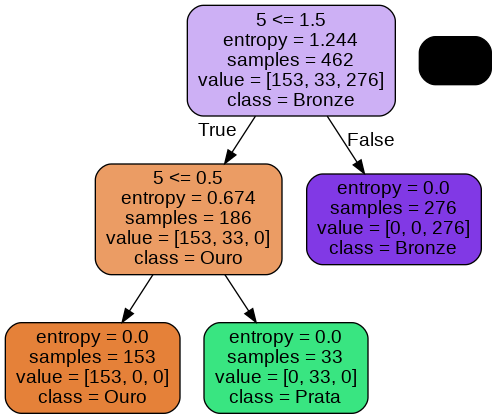

In [38]:
import pydotplus
from IPython.display import Image

# Create DOT data
dot_data = tree.export_graphviz(clientes_tree, out_file=None, 
                                proportion=False,
                                rounded =True,
                                filled=True,
                                feature_names=np.arange(6),  
                                class_names=["Ouro", "Prata", "Bronze"])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())


A Entropy mede o grau de impureza da amostra, e o próximo ramo, objetiva um ganho de informação, reduzindo a entropia e tornando as amostras mais distinguíveis.

Na folha com a condição "false", podemos observar a entropia igual a 0, possuindo 276 exemplos, sem erros, classificando estes exemplos como Bronze.

Na condição true, podemos observar a diminuição da entropia, possuindo 186 exemplos e duas classificações: Ouro e Prata. Em seguida, são criadas mais duas separações, com acerto de 100%, classificando 153 exemplos como ouro e 33 como prata.

Considerações sobre a árvores de decisão:

É um modelo muito intuitivo e simples de interpretar pelo fato de poderem ser visualizadas.
Não necessita de grandes pré-processamento de dados, como a normalização ou escalonamento de dados.
Utiliza o modelo conhecido como caixa branca. Ou seja, as decisões que o modelo toma podem ser explicadas e interpretadas.